In [2]:
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [5]:
tips.rename({'size':'weight'}, axis=1, inplace=True) 

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
weight        244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [8]:
tips['weight'] = tips['weight'].astype('category')

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
weight        244 non-null category
dtypes: category(5), float64(2)
memory usage: 5.8 KB


In [11]:
tips['weight'].info() # AttributeError: 'Series' object has no attribute 'info'

AttributeError: 'Series' object has no attribute 'info'

금요일에 진짜 전문가들은 어떻게 분석하는지 해볼 것임

In [14]:
tips.sex.value_counts() # category이면 이거 지원해줌
# 카테고리별 개수별로 표현해줌
# 이런 결과가 있으면 항상 그래프를 그릴 수 있음.
# 판다스 그래프는 정말 그리기 쉬움

Male      157
Female     87
Name: sex, dtype: int64

In [16]:
tips.sex.value_counts().loc['Male']

157

In [17]:
tips.sex.value_counts().iloc[0]

157

In [15]:
tips.weight.value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: weight, dtype: int64

판다스 그래프는 index가 x축

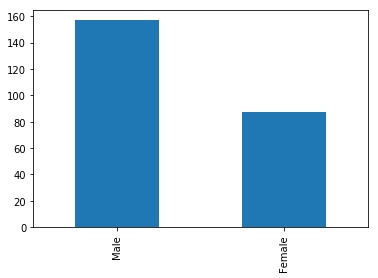

In [18]:
# 결과에 .plot만 붙이면 됨
tips.sex.value_counts().plot.bar()

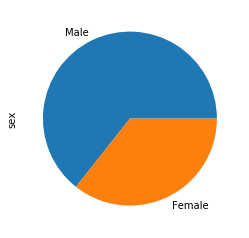

In [19]:
tips.sex.value_counts().plot.pie()

In [20]:
tips.sex.unique() # 이 두개 외에 데이터를 집어넣으려고 하면 error가 난다.

[Female, Male]
Categories (2, object): [Female, Male]

In [21]:
tips.weight.unique()

[2, 3, 4, 1, 6, 5]
Categories (6, int64): [2, 3, 4, 1, 6, 5]

In [22]:
# object도 value_counts() 나온다.
tips.sex.nunique() # 카테고리 개수

2

In [23]:
t = tips.sex.cat

In [24]:
# t.add_categories # 추가 가능
# 문자열은 .str, 카테고리는 .cat 쓰면 추가 기능이 나온다.

In [25]:
t.name

/Users/eunha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.cat.name` has been deprecated. Use `Series.name` instead.
  """Entry point for launching an IPython kernel.


'sex'

In [26]:
t.codes # 내부적으로 카테고리를 해놓으면 문자열로 하면 비효율적이기 때문에 숫자로 관리한다. <- codes

0      1
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
214    1
215    1
216    0
217    0
218    0
219    1
220    0
221    1
222    0
223    1
224    0
225    1
226    1
227    0
228    0
229    1
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    1
239    0
240    1
241    0
242    0
243    1
Length: 244, dtype: int8

실제 기계학습할 때는 카테고리 데이터 안 쓰고 숫자 쓰기 대문에 .codes 쓴다.  
label encoding을 편하게 해줄 때 codes를 써가지고 하면 됨.  
tips.dt. <- df객체는 이렇게 하면 추가 기능이 나옴

지금까지 기본적으로 변화시키는 거 쭉 봤음.  
size의 타입도 바꿨어야 했음. <- 도메인 지식이 있었으면.  

In [28]:
tips.weight.value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: weight, dtype: int64

In [30]:
tips.groupby(['sex','size']).count()

KeyError: 'size'

인덱스 슬라이싱
loc, iloc
열,...
얘는 가장 기본적인 데이터셋이었음

In [31]:
mpg = sns.load_dataset('mpg')

In [33]:
mpg # 연비 측정하는 데이터

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [32]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


horsepower      392 non-null float64 <- 개수가 다름  
즉 6개가 missing data

그럼 missing data가 어디에 있는지?  
그럴 때 데이터의 부분을 보는 명령어가 있음

In [34]:
# parameter 안 넘겨주면 앞에서부터 다섯게
mpg.head() # tail()도 있음

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [39]:
mpg.head().describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,5.00000,5.0,5.000000,5.000000,5.000000,5.00000,5.0
mean,16.80000,8.0,316.200000,147.000000,3503.000000,11.40000,70.0
std,1.30384,0.0,19.879638,13.038405,110.006818,0.65192,0.0
min,15.00000,8.0,302.000000,130.000000,3433.000000,10.50000,70.0
25%,16.00000,8.0,304.000000,140.000000,3436.000000,11.00000,70.0
50%,17.00000,8.0,307.000000,150.000000,3449.000000,11.50000,70.0
75%,18.00000,8.0,318.000000,150.000000,3504.000000,12.00000,70.0
max,18.00000,8.0,350.000000,165.000000,3693.000000,12.00000,70.0


보통 책에는 짧게 보여주려고 head() 쓰는데 실무 테크닉은 좀 다르다.

In [37]:
# 처음에 수집한 것과 뒤에 수집한 게 다른 경우가 많아서 그거 체크하려고
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [40]:
# 데이터 수집이 일정하게 됐는지 아닌지 볼 때
mpg.tail().describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,5.00000,5.0,5.000000,5.000000,5.000000,5.000000,5.0
mean,32.40000,4.0,122.200000,76.600000,2512.000000,17.960000,82.0
std,6.80441,0.0,16.813685,13.992855,285.626504,4.811237,0.0
min,27.00000,4.0,97.000000,52.000000,2130.000000,11.600000,82.0
25%,28.00000,4.0,119.000000,79.000000,2295.000000,15.600000,82.0
50%,31.00000,4.0,120.000000,82.000000,2625.000000,18.600000,82.0
75%,32.00000,4.0,135.000000,84.000000,2720.000000,19.400000,82.0
max,44.00000,4.0,140.000000,86.000000,2790.000000,24.600000,82.0


In [35]:
mpg.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
356,32.4,4,108.0,75.0,2350,16.8,81,japan,toyota corolla
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick
286,17.6,8,302.0,129.0,3725,13.4,79,usa,ford ltd landau
290,15.5,8,351.0,142.0,4054,14.3,79,usa,ford country squire (sw)
375,36.0,4,105.0,74.0,1980,15.3,82,europe,volkswagen rabbit l
191,22.0,6,225.0,100.0,3233,15.4,76,usa,plymouth valiant
20,25.0,4,110.0,87.0,2672,17.5,70,europe,peugeot 504
192,22.0,6,250.0,105.0,3353,14.5,76,usa,chevrolet nova
297,25.4,5,183.0,77.0,3530,20.1,79,europe,mercedes benz 300d
89,15.0,8,318.0,150.0,3777,12.5,73,usa,dodge coronet custom


In [36]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


3) head() 4) tail() sample()

In [41]:
!pip install missingno

In [42]:
import missingno as mino

In [43]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

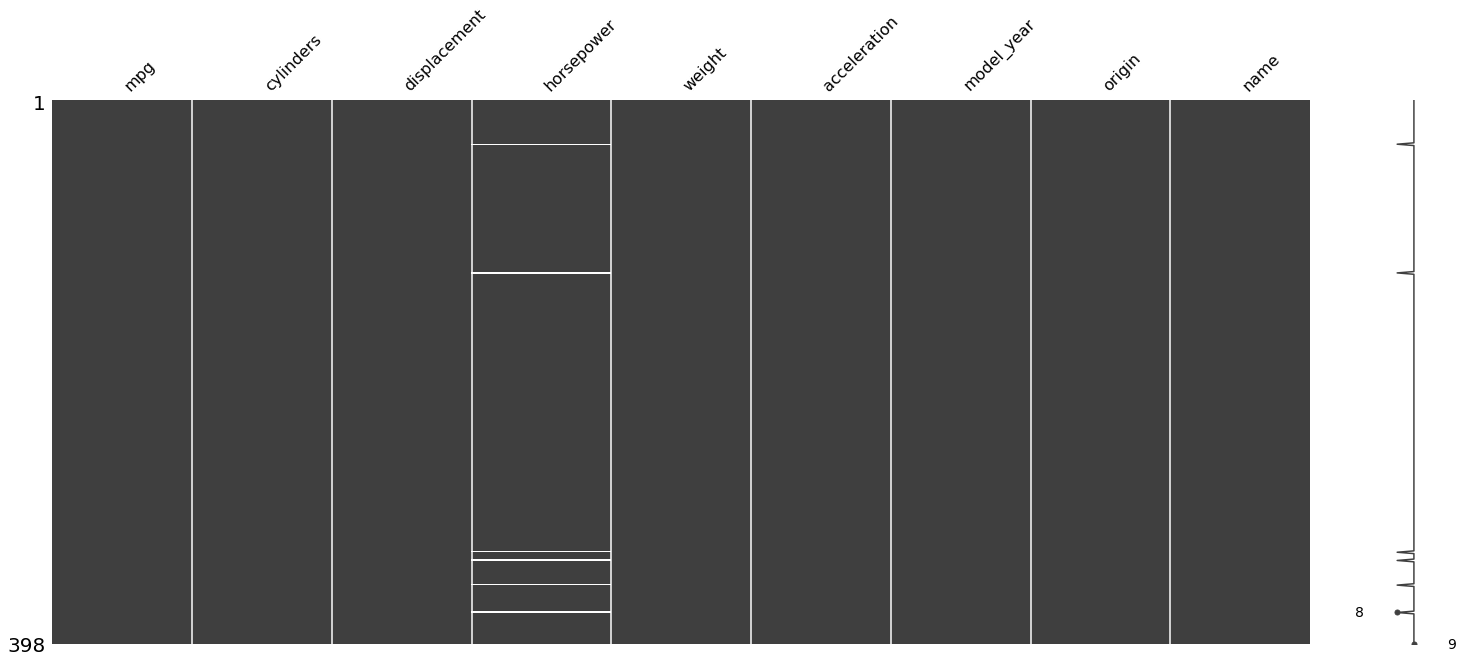

In [44]:
mino.matrix(mpg)

보통 뒷부분에 실수가 많음 -> 뒷부분에 데이터를 못 믿기 때문에 뒷부분을 싹 다 전수조사 했을 것

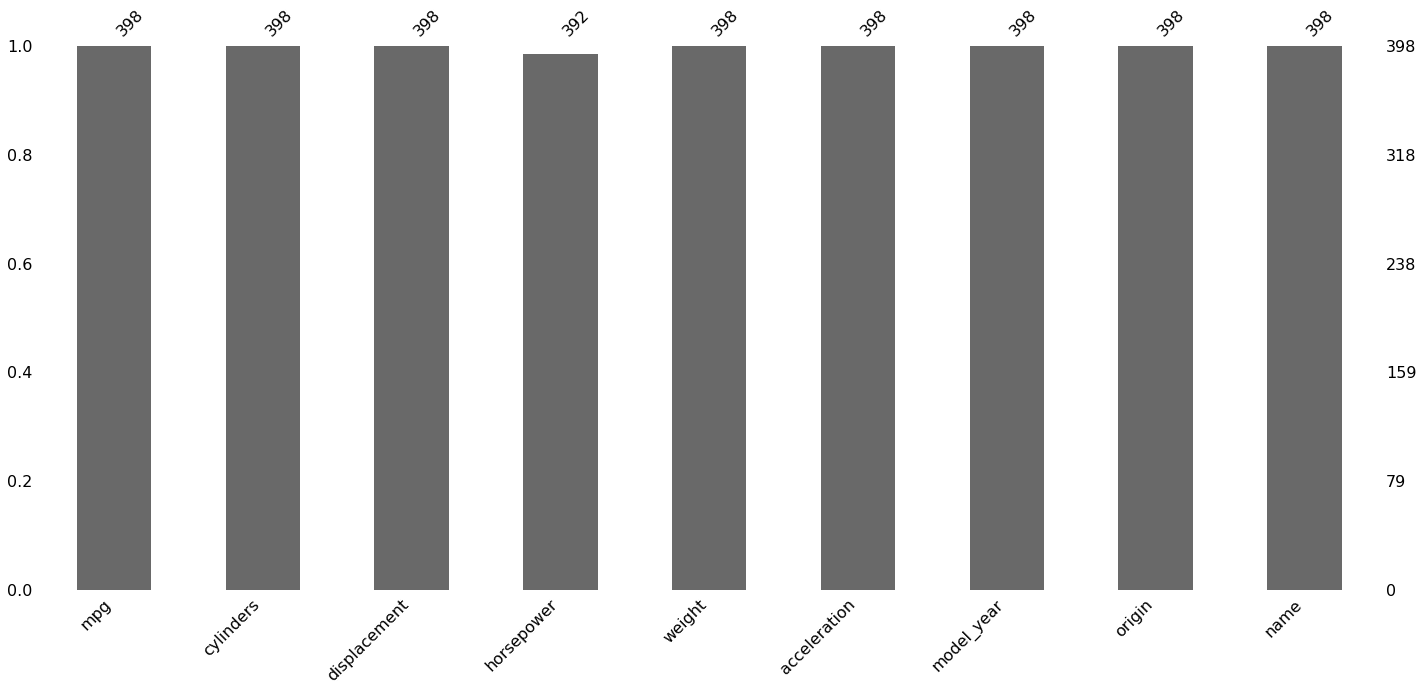

In [45]:
mino.bar(mpg)

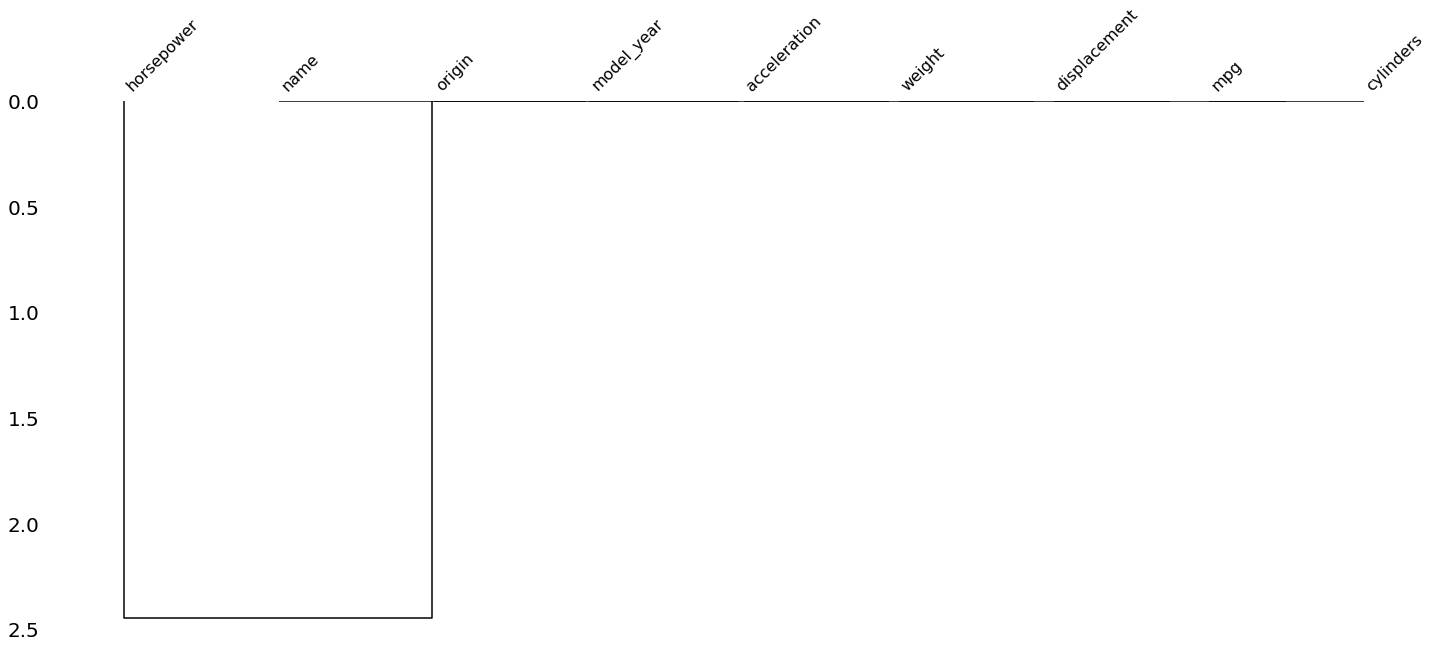

In [46]:
mino.dendrogram(mpg) # <-?

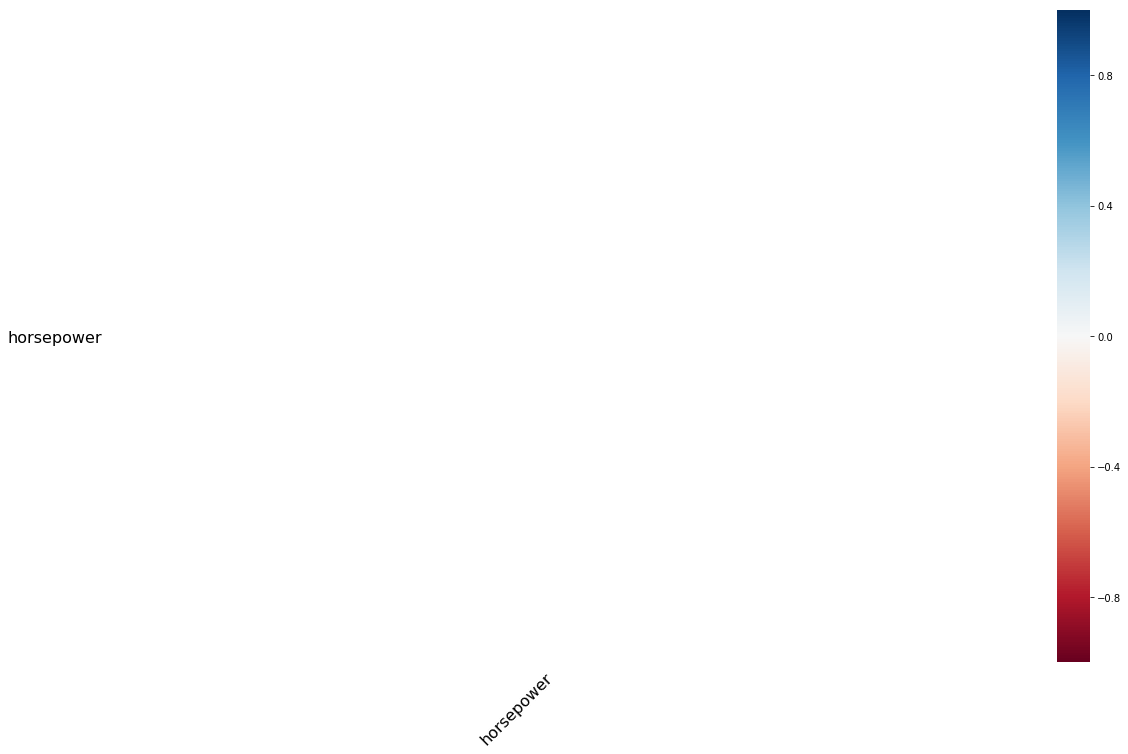

In [47]:
mino.heatmap(mpg) # heatmap이 안나오는 버그가 있음..데이터가 너무 많아서. 크면 안나오는 버그

In [50]:
mpg.isna() # predicate 함수

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [51]:
mpg['horsepower'].isna()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
368    False
369    False
370    False
371    False
372    False
373    False
374     True
375    False
376    False
377    False
378    False
379    False
380    False
381    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [53]:
# T/F만 나오면 마스킹 기법 쓸 수 있음
mpg[mpg.horsepower.isna()] # NaN값 있는 애만 찾아냈음

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [54]:
mpg.horsepower.isna().sum() # True는 숫자로 표현하면 1

6

In [55]:
import pandas as pd

In [56]:
pd.isna == pd.isnull

True

isna하고 isnull하고 똑같다

이제 미싱 데이터를 처리하는 방법 (여기서는 크게 두가지)  
1) 가장 간단한 방법 : 없애버림  
    그런데 398개 중에서 6개 버리는 거... 여기서는 스몰데이터라서 막 버릴 때 문제가 생김  
    예측 분석할 때는 데이터가 정확하진 않지만 조금 변형되어도 성능이 올라가는데  
    그냥 분석할 때는 NaN가 있으면 똑바로 안 나옴  
    기계학습하는 사람은 더 견딜 수 없음 <- NaN 있으면 에러 나옴   
    NaN은 무조건 없애야 됨  

In [57]:
# 없애는 방법 아까 drop
# 판다스 만든 사람 좋은 사람..
# mpg.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# how : {'any', 'all'}, default 'any'
#     Determine if row or column is removed from DataFrame, when we have
#     at least one NA or all NA.
#     * 'any' : If any NA values are present, drop that row or column.
#     * 'all' : If all values are NA, drop that row or column.
mpg.dropna() # 이럴 때 inplace 해줘야 반영됨
# 근데 이방법 별로 안 좋음

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


2) 가짜 데이터 씌워넣기

In [58]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [59]:
# mpg.fillna(
#     value=None,
#     method=None,
#     axis=None,
#     inplace=False,
#     limit=None,
#     downcast=None,
#     **kwargs,
# )
# 미친듯이 직관에 맞춰서 특정값 넣을 수 있음
# Fill NA/NaN values using the specified method.

# mpg.fillna

사람마다 가짜 데이터 비슷한 값 넣는 걸 interpolate

시간에 따라 수집됐으면 이 시간 근처의 값이랑 비슷할 확률이 높음 그거 평균 넣기도 하고  
전체 평균 넣기도 하고  
비슷한 애는 값이 비슷하다는 가정인 K-means 예측 써서 넣는 방법  
미싱 데이터 테크닉은 결국 가짜 데이터 만드는 테크닉하고 비슷함.

cold start 문제  
: 데이터가 처음에 없어서 알고리즘이 잘 작동되지 않는 문제  
데이터가 없으면 알고리즘이 작동이 안됨  
처음에는 가짜 데이터 만들어서 쓰다가 나중에 진짜 데이터로 대체해서 써야 됨.  
작년에 이렇게 했는데 다 실패했음.  
왜냐하면 cold start는 도메인 지식이 있어야 함.  

In [60]:
mpg.fillna(3).loc[32] # horsepower 3

mpg                     25
cylinders                4
displacement            98
horsepower               3
weight                2046
acceleration            19
model_year              71
origin                 usa
name            ford pinto
Name: 32, dtype: object

In [61]:
# interpolate 기법

In [62]:
# from scipy import interpolate <- 이렇게 해서 쓰는 방법도 있는데 이건 도메인에 따라서 다 다름 프로젝트 진행할 때 그 팀에 가서 알려줄 것

내일 판다스 더하고 사이킷 목요일까지 사이킷 해서 전문가 어떻게 분석하는가  
보통 함수로 싹다 만들어놓고 데코레이터 붙여서 해놓음

In [63]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [64]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


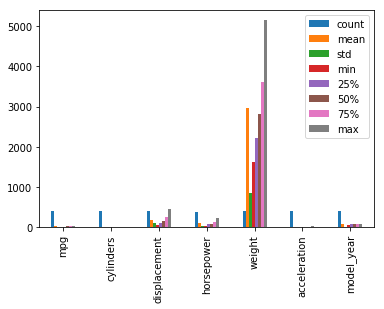

In [65]:
mpg.describe().T.plot.bar()
# weight가 너무 커서 빼고자 함

In [66]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [67]:
mpg.columns[:-2]

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [68]:
mpg[mpg.columns[:-2]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
5,15.0,8,429.0,198.0,4341,10.0,70
6,14.0,8,454.0,220.0,4354,9.0,70
7,14.0,8,440.0,215.0,4312,8.5,70
8,14.0,8,455.0,225.0,4425,10.0,70
9,15.0,8,390.0,190.0,3850,8.5,70


In [69]:
mpg[mpg.columns[1,2,3,4]] # IndexError: too many indices for array 1차기 때문에 안됨

IndexError: too many indices for array

In [70]:
mpg[mpg.columns[1:4]]

,cylinders,displacement,horsepower
0,8,307.0,130.0
1,8,350.0,165.0
2,8,318.0,150.0
3,8,304.0,150.0
4,8,302.0,140.0
5,8,429.0,198.0
6,8,454.0,220.0
7,8,440.0,215.0
8,8,455.0,225.0
9,8,390.0,190.0


In [75]:
# mpg.filter(items=None, like=None, regex=None, axis=None)
mpg.filter(regex='[^weight]') # 내가 원하는 것만 넣거나 뺄 수 있음

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,8.5,70,usa,amc ambassador dpl


In [76]:
mpg.filter(regex='') # 저것 외에도 방법 많음

TypeError: Must pass either `items`, `like`, or `regex`

columns, fancyindexing, filter (4개)  
+1 select_dtypes  
그 중 가장 어려운 게 filter <- 정규식

In [77]:
mpg.select_dtypes('object')

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
5,usa,ford galaxie 500
6,usa,chevrolet impala
7,usa,plymouth fury iii
8,usa,pontiac catalina
9,usa,amc ambassador dpl


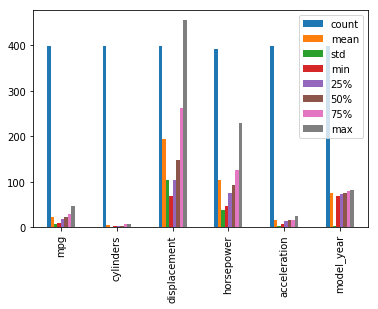

In [79]:
mpg.filter(regex='[^weight]').describe().T.plot.bar() # 종류마다 색깔이 다르게 나온다.

In [80]:
mpg.filter(regex='[^weight]').describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


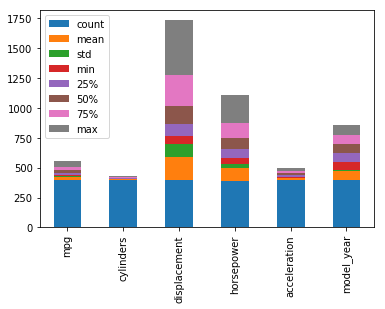

In [81]:
mpg.filter(regex='[^weight]').describe().T.plot.bar(stacked=True) # 쌓여서 그려짐

In [87]:
# mpg data는 regression 데이터이기 때문에 pairplot을 굳이 안 그려도 됨  
# pairplot 대신 컬럼끼리 상관분석할 수 있음

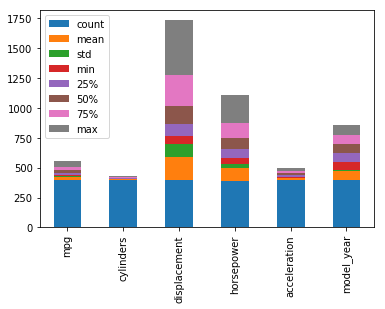

In [82]:
# <matplotlib.axes._subplots.AxesSubplot at 0x1a284184a8> <- 이런 거 없애는 방법은
mpg.filter(regex='[^weight]').describe().T.plot.bar(stacked=True); # 뒤에 세미콜론 찍기

In [88]:
# Signature: mpg.corr(method='pearson', min_periods=1)
# Docstring:
# Compute pairwise correlation of columns, excluding NA/null values.

# Parameters
# ----------
# method : {'pearson', 'kendall', 'spearman'} or callable <- 자습..
#     * pearson : standard correlation coefficient
#     * kendall : Kendall Tau correlation coefficient
#     * spearman : Spearman rank correlation
#     * callable: callable with input two 1d ndarrays
#         and returning a float
#         .. versionadded:: 0.24.0
mpg.corr() # 상관계수 상관분석할 때

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
# 상관계수하고 공분산 구하는 거 안알려줌 <- 자습..
# 상관계수는 1에 가까우면 가까울수록 관련성이 높고 마이너스는...
# 그런데 이 표 눈에 잘 안 띈다.

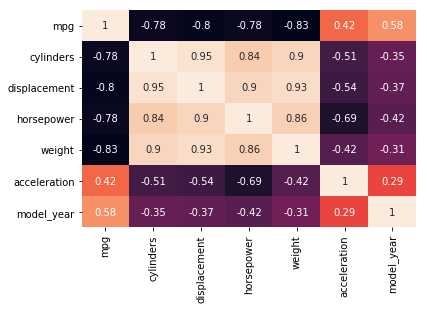

In [93]:
sns.heatmap(mpg.corr(), annot=True, cbar=False); # 옆에 있는 게 colorbar

In [89]:
mpg.cov() # 공분산

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.089611,-10.308911,-655.402318,-233.857926,-5505.211745,9.058930,16.741163
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499
displacement,-655.402318,168.623214,10872.199152,3614.033744,82368.423240,-156.332976,-142.717137
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432
weight,-5505.211745,1290.695575,82368.423240,28265.620231,717140.990526,-974.899011,-959.946344
acceleration,9.058930,-2.370842,-156.332976,-73.186967,-974.899011,7.604848,2.938105
model_year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443


In [94]:
# 다중공선성 <- 자습
# 다중공선성을 역이용해서 feature selection에 사용
# feature selection할 때 한 번 더함
# 상관분석은 꽤 중요한 요인 중 하나

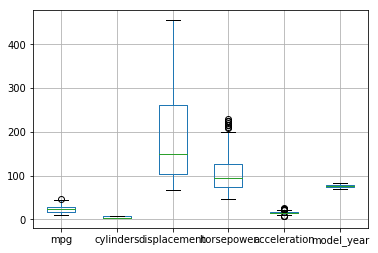

In [96]:
mpg.filter(regex='[^weight]').boxplot()

In [97]:
# 말콤 글래드웰 아웃라이어 책.. <- 자습
# 일만 시간의 법칙

In [ ]:
# 아웃라이어 : 평균에서 벗어나는 사람
# 또다른 의미로 좋은 의미
# 아웃라이어 어떻게 제거할까?
# 이 아웃라이어가 진짜일까? <- 이것도 하나의 이슈
# 신용카드 백만건쓰면 몇십건밖에 안나옴 가짜로 쓴 거 관점에서 보면 얘는 아웃라이어 보통 데이터와 다른 데이터
# pyod라는 패키지 outlier detection <- deeplearning 기법으로 많이 나옴
# 찾기가 굉장히 복잡해서...
# 아웃라이어를 보통 없애는데 그게 진짜 중요한 데이터일 수도 있음. 막 없앴다가 성능이 더 떨어지는 경우도 있다.
# 아웃라이어가 있다 정도만 알지 무조건 없애면 큰일남
# 없앨지 살릴지 좀 복잡한 거 써서 결정해야 함
# boxplot에서는 아웃라이어까지 볼 수 있다
# 아웃라이어 + 여기서 또...
# 딥러닝, 뉴럴 네트워크할 때 데이터의 정규화를 했음
# 클러스터링이나 distance-based 모델같은 데서는 acceleration...(저 위 그래프에) 이거 때문에 모델 개판되는 경우 있음
# 그래프를 그리는 이유가 있다!
# 거의 항상 모든 데이터에 얘는 기본
# 그 다음부터 쪼개서 해야 된다

In [ ]:
# outlier detection은 언젠가 할 것임 꽤 중요하기 때문에

In [100]:
# percentiles : list-like of numbers, optional
#     The percentiles to include in the output. All should
#     fall between 0 and 1. The default is
#     ``[.25, .5, .75]``, which returns the 25th, 50th, and
#     75th percentiles.
mpg.describe([.0005,.5,.75]) # 대충 어디에 아웃라이어를 잡을지 알 수 있음
# 아웃라이어 디텍션 막 했다가 피보는 경우 많음
# 그런데 거꾸로 예전에 지금은 데이터 분석한다고 하면 어렵다 이런 이야기 하지만
# 옛날에 인식이 별로였음

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
0.05%,9.198500,3.000000,68.397000,46.000000,1620.146000,8.099250,70.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
# 이 다음부터는 데이터별 특성에 따라 다른 접근 방법
# 여기까지는 모든 데이터가 똑같이 함
# 그 전에 우리는 뭘 하나 더 함

In [85]:
mpg.filter(regex='[^w.+?]')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
